# Covid 19 Data Analysis and Forecasting using Prophet 

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from plotly import tools, subplots
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from matplotlib import pyplot as plt


### Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
data=pd.read_csv("train.csv")
data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
25661,35646,NaN,Zimbabwe,2020-04-08,11.0,3.0
25662,35647,NaN,Zimbabwe,2020-04-09,11.0,3.0
25663,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
25664,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0


### Preprocessing of Data

In [ ]:
df = pd.DataFrame(data, columns= ['Country_Region','Date','ConfirmedCases','Fatalities'])

In [ ]:
df.rename({'Country_Region': 'country', 'Date': 'date', 'ConfirmedCases': 'confirmed', 'Fatalities': 'fatalities'}, axis=1, inplace=True)

In [ ]:
df.tail()

,country,date,confirmed,fatalities
25661,Zimbabwe,2020-04-08,11.0,3.0
25662,Zimbabwe,2020-04-09,11.0,3.0
25663,Zimbabwe,2020-04-10,13.0,3.0
25664,Zimbabwe,2020-04-11,14.0,3.0
25665,Zimbabwe,2020-04-12,14.0,3.0


In [ ]:
ww_df = df.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
ww_df['new_case'] = ww_df['confirmed'] - ww_df['confirmed'].shift(1)
ww_df.head(75)

,date,confirmed,fatalities,new_case
0,2020-01-22,554.0,17.0,NaN
1,2020-01-23,653.0,18.0,99.0
2,2020-01-24,939.0,26.0,286.0
3,2020-01-25,1432.0,42.0,493.0
4,2020-01-26,2113.0,56.0,681.0
...,...,...,...,...
70,2020-04-01,932434.0,46804.0,75114.0
71,2020-04-02,1013132.0,52978.0,80698.0
72,2020-04-03,1095744.0,58782.0,82612.0
73,2020-04-04,1197235.0,64601.0,101491.0


In [ ]:
melt_df = pd.melt(ww_df, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])

In [ ]:
fig = px.line(melt_df, x="date", y="value", color='variable', 
              title="Worldwide Confirmed/Death/New Cases")
fig.show()

In [ ]:
fig = px.line(melt_df, x="date", y="value", color='variable',
              title="Worldwide Confirmed/Death/New Cases (Log scale)",
             log_y=True)
fig.show()

In [ ]:
ww_df['mortality'] = ww_df['fatalities'] / ww_df['confirmed']

fig = px.line(ww_df, x="date", y="mortality", 
              title="Worldwide Mortality Rate Over Time")
fig.show()

In [ ]:
countries = df['country'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

184 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [ ]:
country_df = df.groupby(['date', 'country'])[['confirmed', 'fatalities']].sum().reset_index()
country_df.head()

,date,country,confirmed,fatalities
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-22,Albania,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0
4,2020-01-22,Angola,0.0,0.0


In [ ]:
target_date = df['date'].max()

print('Date: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(df.query('(date == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Date:  2020-04-12
311 countries have more than 1 confirmed cases
286 countries have more than 10 confirmed cases
223 countries have more than 100 confirmed cases
118 countries have more than 1000 confirmed cases
32 countries have more than 10000 confirmed cases


In [ ]:
top_country_df = country_df.query('(date == @target_date) & (confirmed > 1000)').sort_values('confirmed', ascending=False)
#top_country_melt_df = pd.melt(top_country_df, id_vars='country', value_vars=['confirmed', 'fatalities'])

In [ ]:
top25_countries = top_country_df.iloc[:25]['country'].unique()
top25_countries_df = country_df[country_df['country'].isin(top25_countries)]
fig = px.line(top25_countries_df,
              x='date', y='confirmed', color='country',
              title=f'Confirmed Cases for top 30 country as of {target_date}')
fig.show()

In [ ]:
india_df = country_df[country_df['country']=="India"]


In [ ]:
india_df

,date,country,confirmed,fatalities
78,2020-01-22,India,0.0,0.0
262,2020-01-23,India,0.0,0.0
446,2020-01-24,India,0.0,0.0
630,2020-01-25,India,0.0,0.0
814,2020-01-26,India,0.0,0.0
...,...,...,...,...
14246,2020-04-08,India,5916.0,178.0
14430,2020-04-09,India,6725.0,226.0
14614,2020-04-10,India,7598.0,246.0
14798,2020-04-11,India,8446.0,288.0


In [ ]:
fig = px.line(india_df,
              x='date', y='confirmed', color='country',
              title=f'Confirmed Cases for India as on {target_date}')
fig.show()

In [ ]:
top30_countries = top_country_df.sort_values('fatalities', ascending=False).iloc[:25]['country'].unique()
top30_countries_df = country_df[country_df['country'].isin(top30_countries)]
fig = px.line(top30_countries_df,
              x='date', y='fatalities', color='country',
              title=f'Fatalities for top 30 country as of {target_date}')
fig.show()

In [ ]:
top_country_df = country_df.query('(date == @target_date)')
top_country_df['mortality_rate'] = top_country_df['fatalities'] / top_country_df['confirmed']
top_country_df = top_country_df.sort_values('mortality_rate', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.bar(top_country_df[:25]  [::-1],
             x='mortality_rate', y='country',
             title=f'Mortality rate HIGH: top 10 countries on {target_date}', text='mortality_rate', height=800, orientation='h')
fig.show()

In [ ]:
country_df['prev_confirmed'] = country_df.groupby('country')['confirmed'].shift(1)
country_df['new_case'] = country_df['confirmed'] - country_df['prev_confirmed']
country_df['new_case'].fillna(0, inplace=True)
top25_country_df = country_df[country_df['country'].isin(top25_countries)]

fig = px.line(top25_country_df,
              x='date', y='new_case', color='country',
              title=f'Daily New Confirmed Cases Worldwide')
fig.show()

In [ ]:
india_df = top25_country_df[top25_country_df['country']=="India"]


In [ ]:
fig = px.line(india_df,
              x='date', y='new_case', color='country',
              title=f'Daily New Confirmed Cases In India ')
fig.show()

In [ ]:
country_latest = country_df.query('date == @target_date')

fig = px.choropleth(country_latest, locations="country", 
                    locationmode='country names', color="confirmed", 
                    hover_name="country", range_color=[1, 50000], 
                    color_continuous_scale='portland', 
                    title=f'Asian Countries with Confirmed Cases as of {target_date}', scope='asia', height=800)
fig.show()


In [ ]:
india_df


,date,country,confirmed,fatalities,prev_confirmed,new_case
78,2020-01-22,India,0.0,0.0,NaN,0.0
262,2020-01-23,India,0.0,0.0,0.0,0.0
446,2020-01-24,India,0.0,0.0,0.0,0.0
630,2020-01-25,India,0.0,0.0,0.0,0.0
814,2020-01-26,India,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
14246,2020-04-08,India,5916.0,178.0,5311.0,605.0
14430,2020-04-09,India,6725.0,226.0,5916.0,809.0
14614,2020-04-10,India,7598.0,246.0,6725.0,873.0
14798,2020-04-11,India,8446.0,288.0,7598.0,848.0


### Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

In [ ]:
from fbprophet import Prophet

In [ ]:
x_predict=pd.DataFrame(india_df,columns=['date','confirmed'])

In [ ]:
x_predict

,date,confirmed
78,2020-01-22,0.0
262,2020-01-23,0.0
446,2020-01-24,0.0
630,2020-01-25,0.0
814,2020-01-26,0.0
...,...,...
14246,2020-04-08,5916.0
14430,2020-04-09,6725.0
14614,2020-04-10,7598.0
14798,2020-04-11,8446.0


In [ ]:
x_predict.columns=['ds','y']

In [ ]:
x_predict

,ds,y
78,2020-01-22,0.0
262,2020-01-23,0.0
446,2020-01-24,0.0
630,2020-01-25,0.0
814,2020-01-26,0.0
...,...,...
14246,2020-04-08,5916.0
14430,2020-04-09,6725.0
14614,2020-04-10,7598.0
14798,2020-04-11,8446.0


In [ ]:
m = Prophet(interval_width=0.98)
m.fit(x_predict)
future = m.make_future_dataframe(periods=18)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
95,2020-04-26
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,5774.251190,4494.286501,7036.852932
79,2020-04-10,6117.440637,4947.181751,7341.835435
80,2020-04-11,6498.537867,5308.308931,7696.346318
81,2020-04-12,6864.040702,5583.890051,8139.347867
82,2020-04-13,7063.439174,5830.919078,8396.342348
83,2020-04-14,7374.342282,6125.916336,8581.915280
84,2020-04-15,7749.926994,6481.663083,9066.718806
85,2020-04-16,8123.042120,6956.233040,9356.999816
86,2020-04-17,8466.231567,7201.080653,9751.341397
87,2020-04-18,8847.328797,7613.998803,10054.908623


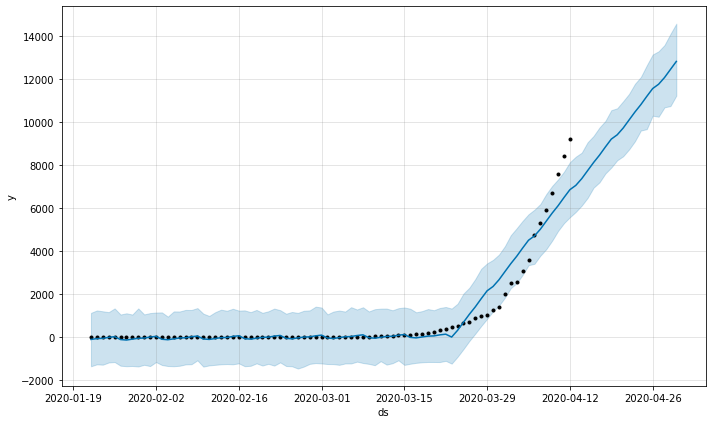

In [ ]:
 confirmed_forecast_plot =m.plot(forecast)

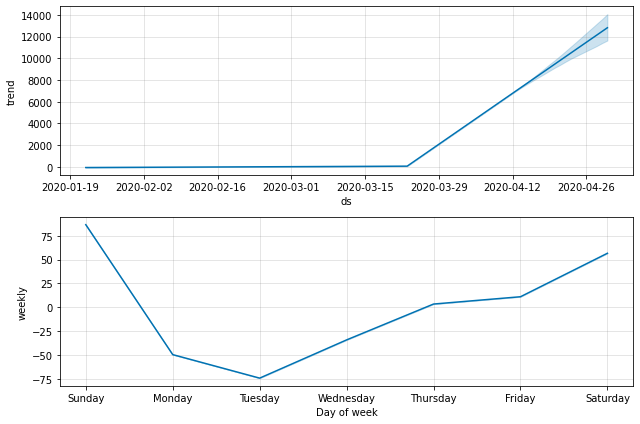

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
z_predict=pd.DataFrame(india_df,columns=['date','new_case'])

In [ ]:
z_predict.columns=['ds','y']

In [ ]:
z_predict

,ds,y
78,2020-01-22,0.0
262,2020-01-23,0.0
446,2020-01-24,0.0
630,2020-01-25,0.0
814,2020-01-26,0.0
...,...,...
14246,2020-04-08,605.0
14430,2020-04-09,809.0
14614,2020-04-10,873.0
14798,2020-04-11,848.0


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(z_predict)
future = m.make_future_dataframe(periods=18)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
95,2020-04-26
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,602.685506,375.623729,832.733976
79,2020-04-10,588.432304,345.730986,825.085645
80,2020-04-11,642.011845,428.239458,865.833063
81,2020-04-12,642.090302,432.834878,876.545243
82,2020-04-13,730.986640,498.759521,956.336708
83,2020-04-14,677.067855,436.004271,899.547610
84,2020-04-15,752.222618,527.762874,969.611155
85,2020-04-16,776.720340,546.439349,1004.240221
86,2020-04-17,762.467139,540.469796,992.998682
87,2020-04-18,816.046680,603.124129,1053.319634


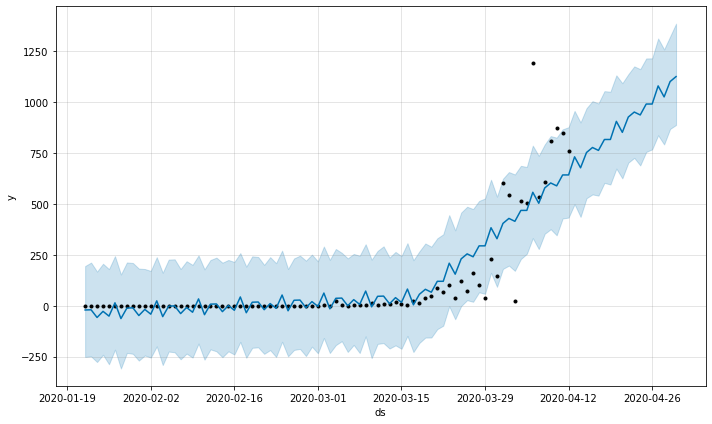

In [ ]:
 confirmed_forecast_plot =m.plot(forecast)

In [ ]:
temp_df = top25_country_df[top25_country_df['country']=="US"]


In [ ]:
c_predict=pd.DataFrame(temp_df,columns=['date','confirmed'])

In [ ]:
c_predict.columns=['ds','y']

In [ ]:
c_predict.columns=['ds','y']

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(c_predict)
future = m.make_future_dataframe(periods=18)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
95,2020-04-26
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,4.569487e+05,446086.096862,4.679816e+05
79,2020-04-10,4.850669e+05,473985.109237,4.959166e+05
80,2020-04-11,5.129978e+05,502574.956772,5.242110e+05
81,2020-04-12,5.405835e+05,530056.777288,5.519204e+05
82,2020-04-13,5.671511e+05,556630.337612,5.779645e+05
83,2020-04-14,5.956951e+05,584354.510008,6.075754e+05
84,2020-04-15,6.245811e+05,611465.150154,6.359500e+05
85,2020-04-16,6.541608e+05,640121.137537,6.668541e+05
86,2020-04-17,6.822790e+05,666231.275152,6.979290e+05
87,2020-04-18,7.102100e+05,690567.430801,7.282468e+05


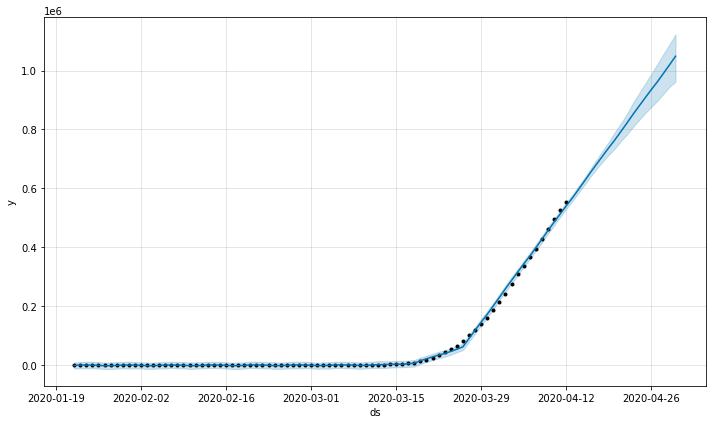

In [ ]:
 confirmed_forecast_plot =m.plot(forecast)